Antes de comenzar, realizaremos los pasos correspondientes para montar nuestro sistema en drive:
*   Importaremos Drive a google colab y montaremos nuestro sistema nos pedira ir a una url y copiar el codigo dado.
*   Crearemos la variable ruta

In [1]:
from google.colab import drive
drive.mount ('/content/awaQuality')

MessageError: ignored

In [ ]:
ruta= '/content/awaQuality/MyDrive/Colab Notebooks/awaQuality'

====Importamos las librerias a utilizar====

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from xgboost import XGBClassifier

Importaremos el archivo csv y mostraremos su info para comprobar que se lean los datos

In [ ]:
df=pd.read_excel(ruta + '/water_potability.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Con el siguente codigo tendremos una previsualización de parte de la Bd donde se encuentran los datos

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


El siguiente codigo analizara las filas y columnas de la Bd en este caso tiene 3276 filas y 10 columnas

In [ ]:
df.shape

(3276, 10)

Y ahora analizaremos los datos con datos faltantes 


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Y crearemos una nueva BD corregida sin los datos faltantes para generar analisis más exactos

In [ ]:
df= df.dropna()

Analizaremos la potabilidad 

In [ ]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

Y utilizaremos un plot para generar graficos para analisis estadistico

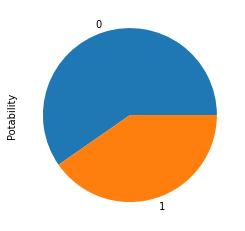

In [ ]:
df.Potability.value_counts().plot(kind ='pie')

Ya que los datos son totalmente disparejos necesitamos equilibrar para no tener errores 

In [ ]:
zero  = df[df['Potability']==0]   
one = df[df['Potability']==1]  
from sklearn.utils import resample

df_minority_upsampled = resample(one, replace = True, n_samples = 1200) 

df = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df) 

Al terminar y equilibrar los datos generamos un nuevo grafico 

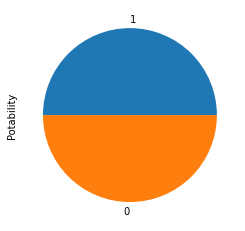

In [ ]:
df.Potability.value_counts().plot(kind ='pie')

  Generaremos un grafico de analisis de correlacion

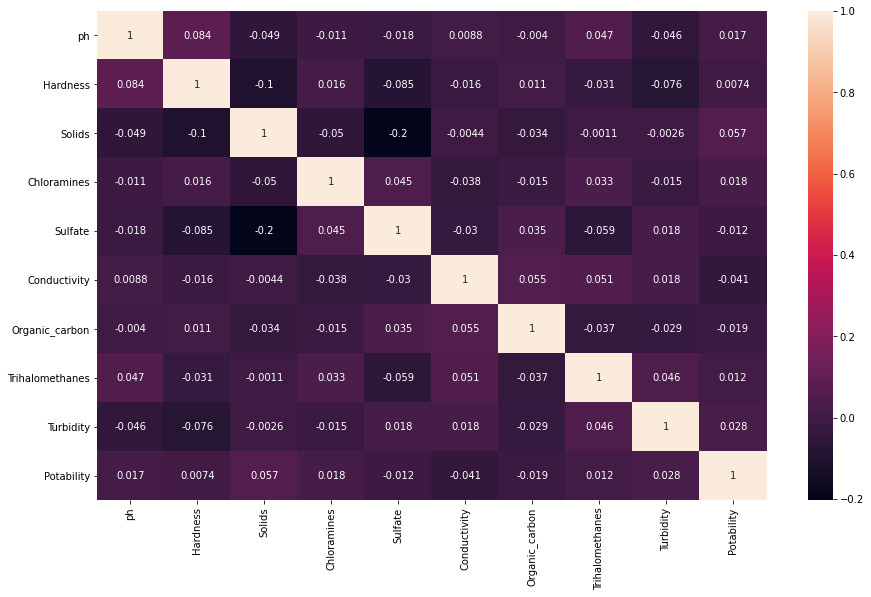

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

Se genera un grafico plot con los valores 0 y 1

Siendo:

0 = Durezas o piedras

1 = El ph

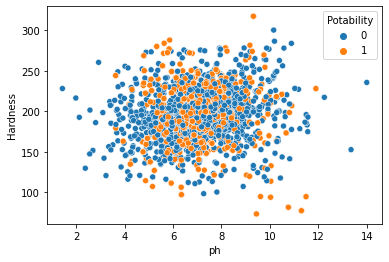

In [ ]:
sns.scatterplot(x=df["ph"], y=df["Hardness"], hue=df.Potability,
data=df)

Se genera un grafico plot con los valores 0 y 1

Siendo:

0 = chloramina

1 = El ph

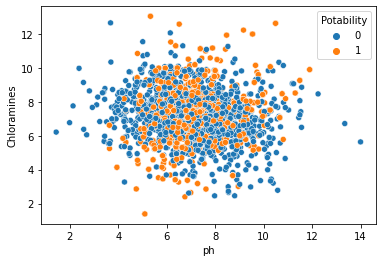

In [ ]:
sns.scatterplot(x=df["ph"], y=df["Chloramines"], hue=df.Potability,
data=df)

Se analiza la potabilidad de acuerdo a sus componentes

In [ ]:
df.corr().abs()['Potability'].sort_values(ascending = False)

Potability         1.000000
Solids             0.057434
Conductivity       0.041042
Turbidity          0.028366
Organic_carbon     0.018778
Chloramines        0.018459
ph                 0.017165
Trihalomethanes    0.011814
Sulfate            0.011581
Hardness           0.007435
Name: Potability, dtype: float64

Separas en las variables x e y para empezar a entrenar

In [ ]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

Estanderizar la escala de varianza

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features= X.columns
X[features] = sc.fit_transform(X[features])

split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

Se ajustan los parametros e hiperparametros

In [ ]:
lr = LogisticRegression(random_state=42)

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) 


para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)

params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

Empezaremos a entrenar el algoritmo :D

In [ ]:
grid_knn.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_ada.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

print("Mejores parametros para KNN:", grid_knn.best_params_)
print("Mejores parametros para Decision Tree:", grid_dt.best_params_)
print("Mejores parametros para Random Forest:", grid_rf.best_params_)
print("Mejores parametros para AdaBoost:", grid_ada.best_params_)
print("Mejores parametros para XGBoost:", rs_xgb.best_params_)

Mejores parametros para KNN: {'n_neighbors': 1}
Mejores parametros para Decision Tree: {'criterion': 'entropy', 'max_depth': 42, 'min_samples_leaf': 1}
Mejores parametros para Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}
Mejores parametros para AdaBoost: {'learning_rate': 1, 'n_estimators': 500}
Mejores parametros para XGBoost: {'n_estimators': 1000, 'learning_rate': 0.2}


Uniremos sus parametros respectivamente

In [ ]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=42, min_samples_leaf=1, random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, random_state=42)
ada = AdaBoostClassifier(n_estimators= 600, learning_rate= 1 )
xgb = XGBClassifier(n_estimators= 250, learning_rate= 0.8)

bagging = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=46, min_samples_leaf=2, random_state=42),
                           n_estimators = 100, random_state = 42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=46,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=2,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
 

In [ ]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
              ('Bagging Classifier', bagging), ('XGBoost', xgb)]

Ajuste clf al conjunto de entrenamiento, Predecir y_pred y Evaluar la precisión de clf en el equipo de prueba

In [ ]:
for classifier_name, classifier in classifiers:
 
    classifier.fit(X_train, y_train)    
   
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)

    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

Logistic Regression : 0.56
K Nearest Neighbours : 0.85
Decision Tree : 0.78
Random Forest : 0.89
AdaBoost : 0.70
Bagging Classifier : 0.89
XGBoost : 0.80


Se testea la precision de 0 y 1

In [ ]:
y_pred_rf= rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       127
           1       0.95      0.81      0.88       113

    accuracy                           0.89       240
   macro avg       0.90      0.89      0.89       240
weighted avg       0.90      0.89      0.89       240



Sus datos fluctuan minimamente entre 82% en el caso de 0 y 83% en el caso de 1

La precisión es de 83%